# **Economy vs. Obama: Sentiment Analysis of Titles of News Articles**

By: Nishita Cheekatamarla, Enmanuel Baez, and Keivon Chamanara

1) Import necessary packages

In [42]:
import pandas as pd

import matplotlib.pyplot as plt

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

from scipy.stats import pearsonr

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


2) Read in dataset

In [18]:
data = pd.read_csv("project1_data.csv")

In [29]:
data

,Title,Headline,Source,Topic,Date
0,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29
3,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29
4,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29
5,Obama Slams 'Divisive' and 'Vulgar' Rhetoric o...,In a speech given at the ceremony for the Tone...,TIME,obama,2016-03-29
6,President Obama rails against vulgar politics ...,President Barack Obama speaks during the award...,Syracuse.com,obama,2016-03-29
...,...,...,...,...,...
37279,American Airlines' 787-9 with premium economy ...,The Fort Worth-based airline's first Boeing 78...,Fort Worth Star Telegram (blog),economy,2016-07-07
37280,UK economy heading for marked slowdown after s...,"LONDON, (Reuters) – Britain's economy looks se...",euronews,economy,2016-07-07
37281,UK economy heading for marked slowdown after Q...,"LONDON, July 7 (Reuters) - Britain's economy l...",Daily Mail,economy,2016-07-07
37283,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,MarketWatch,economy,2016-07-07


3) Perform initial data cleaning. Drop irrelevant columns and format certain columns differently

In [20]:
data = data.drop(['IDLink', 'Facebook', 'GooglePlus', 'LinkedIn'], axis=1)
data

,Title,Headline,Source,Topic,PublishDate
0,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12
1,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27
2,"Microsoft’s Twitter Robot Praises Hitler, Trum...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00
3,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29 02:00:00
4,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29 02:01:07
...,...,...,...,...,...
37283,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,MarketWatch,economy,2016-07-07 15:31:05
37284,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",TASS,economy,2016-07-07 15:31:10
37285,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,Daily Caller,palestine,2016-07-07 15:38:26
37286,Palestine Youth Orchestra prepares for first U...,Palestine Youth Orchestra prepares for first U...,Ahram Online,palestine,2016-07-07 15:59:22


In [21]:
data['Date'] = data['PublishDate'].map(lambda x: str(x)[:-8])
data

,Title,Headline,Source,Topic,PublishDate,Date
0,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29 01:41:12,2016-03-29
1,Microsoft shows how HoloLens can bring distant...,A recent Microsoft Research video shows how th...,Daily Mail,microsoft,2016-03-29 01:41:27,2016-03-29
2,"Microsoft’s Twitter Robot Praises Hitler, Trum...",* Microsoft teamed with Bing to create TayTwee...,EURweb,microsoft,2016-03-29 01:47:00,2016-03-29
3,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29 02:00:00,2016-03-29
4,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29 02:01:07,2016-03-29
...,...,...,...,...,...,...
37283,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,MarketWatch,economy,2016-07-07 15:31:05,2016-07-07
37284,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",TASS,economy,2016-07-07 15:31:10,2016-07-07
37285,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,Daily Caller,palestine,2016-07-07 15:38:26,2016-07-07
37286,Palestine Youth Orchestra prepares for first U...,Palestine Youth Orchestra prepares for first U...,Ahram Online,palestine,2016-07-07 15:59:22,2016-07-07


In [22]:
data = data.drop(['PublishDate'], axis=1)

4) Drop rows where the topic not 'economy' or 'Obama', as they are not relevant to the analysis

In [23]:
data = data[data['Topic'] != 'microsoft']
data = data[data['Topic'] != 'palestine']

In [24]:
data

,Title,Headline,Source,Topic,Date
0,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29
3,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29
4,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29
5,Obama Slams 'Divisive' and 'Vulgar' Rhetoric o...,In a speech given at the ceremony for the Tone...,TIME,obama,2016-03-29
6,President Obama rails against vulgar politics ...,President Barack Obama speaks during the award...,Syracuse.com,obama,2016-03-29
...,...,...,...,...,...
37279,American Airlines' 787-9 with premium economy ...,The Fort Worth-based airline's first Boeing 78...,Fort Worth Star Telegram (blog),economy,2016-07-07
37280,UK economy heading for marked slowdown after s...,"LONDON, (Reuters) – Britain's economy looks se...",euronews,economy,2016-07-07
37281,UK economy heading for marked slowdown after Q...,"LONDON, July 7 (Reuters) - Britain's economy l...",Daily Mail,economy,2016-07-07
37283,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,MarketWatch,economy,2016-07-07


In [31]:
data['Topic'].unique()

array(['economy', 'obama'], dtype=object)

## Exploratory Data Analysis

5) Check the number of null values by column

<Axes: >

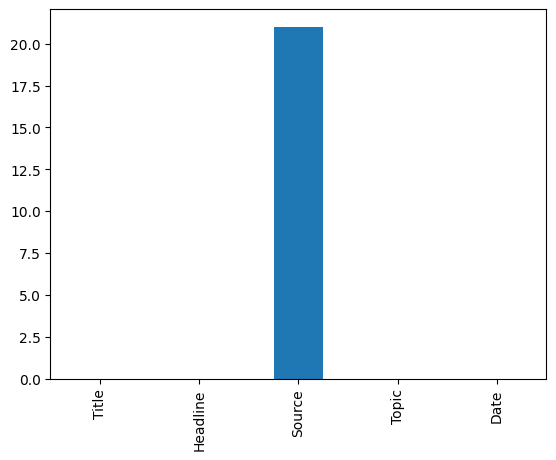

In [32]:
nulls = data.isnull().sum()
nulls.plot(kind="bar")

6) Due to the 'Source' column having a disproportionate amount of nulls, it is dropped from the DataFrame

In [12]:
data = data.drop(['Source'], axis=1)

7) Check the number of values between the two topics

<Axes: >

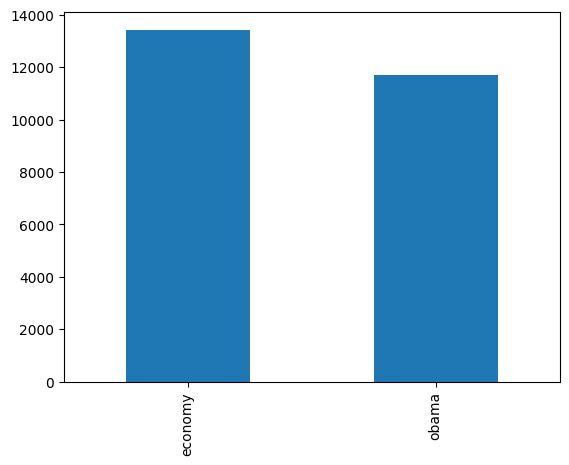

In [33]:
value_counts = data['Topic'].value_counts()
# remove = ['microsoft', 'palestine']
# value_filtered = value_counts[~value_counts.index.isin(remove)]
value_counts.plot(kind='bar')

8) Checks the number of values by topic broken down by date

In [34]:
grouped_data = data.groupby(['Topic', 'Date']).size().unstack()

In [35]:
grouped_data

Date,2016-03-29,2016-03-30,2016-03-31,2016-04-01,2016-04-02,2016-04-03,2016-04-04,2016-04-05,2016-04-06,2016-04-07,...,2016-06-28,2016-06-29,2016-06-30,2016-07-01,2016-07-02,2016-07-03,2016-07-04,2016-07-05,2016-07-06,2016-07-07
Topic,,,,,,,,,,,,,,,,,,,,,
economy,148,161,235,196,58,65,158,181,149,164,...,170,154,147,119,61,80,109,163,118,83
obama,131,130,125,193,89,53,125,173,131,149,...,136,148,166,99,66,70,89,155,85,34


In [ ]:
# grouped_data = grouped_data.drop(grouped_data.index[1])
# grouped_data = grouped_data.drop(grouped_data.index[2])
# grouped_data

9) Visualize the above data to get a glance at any possible correlation between the number of articles posted on a certain day and the topic

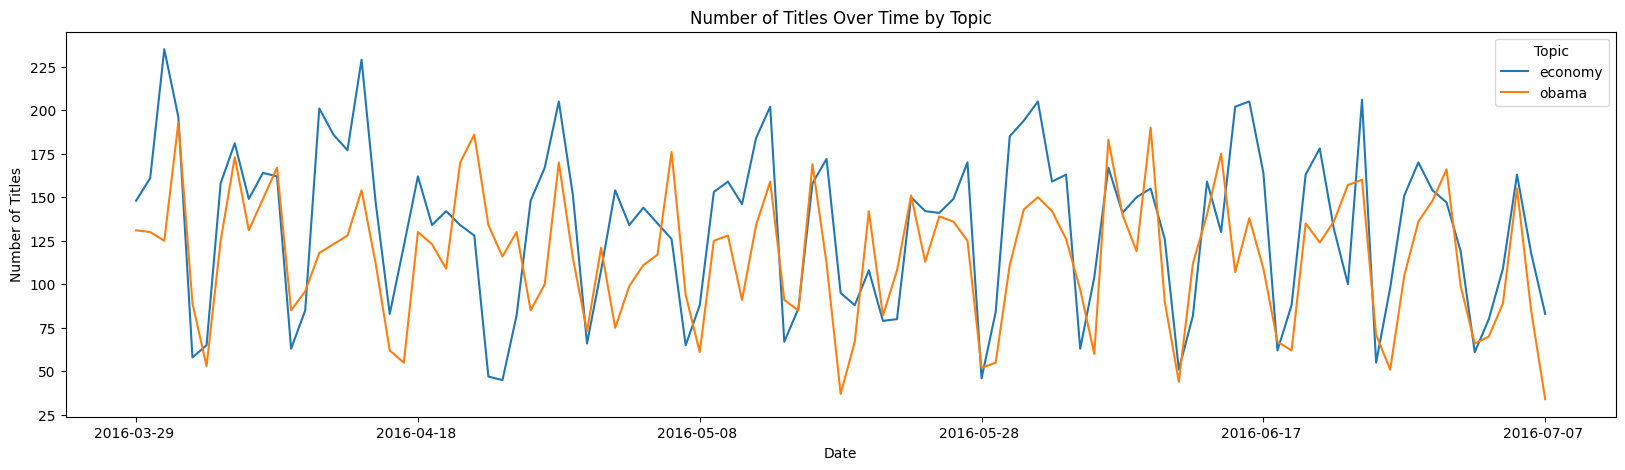

In [36]:
grouped_data = grouped_data.transpose()
grouped_data.plot(kind='line', figsize=(20, 5))
plt.title('Number of Titles Over Time by Topic')
plt.xlabel('Date')
plt.ylabel('Number of Titles')
plt.legend(title='Topic')
plt.show()

10) Find the correlation between number of 'economy' and 'obama' articles published each day (for observation purposes)

In [41]:
corr, _ = pearsonr(grouped_data['economy'], grouped_data['obama'])
print(corr)

0.6220261605380079


## Sentiment Analysis

11) Perform sentiment analysis on each title. Add columns for each sentiment score to the DataFrame. The compound score will be used as it is an overall score given to each title based off the positive, negative, and neutral scores together

In [43]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Title"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Title"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Title"]]
data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["Title"]]

In [44]:
data

,Title,Headline,Source,Topic,Date,Positive,Negative,Neutral,Compound
0,Sliding Economy: FG fights back with N3trn TSA...,With the 2016 budget now passed by the Nationa...,BusinessDay,economy,2016-03-29,0.0,0.252,0.748,-0.4019
3,Flood of Central Bank Moves Can't Get World Ec...,Central bankers have managed to steer the worl...,Bloomberg via Yahoo! Finance,economy,2016-03-29,0.0,0.000,1.000,0.0000
4,USD/JPY: bears lining up on mixed U.S. economy...,"However, this streak of seven-day gains might ...",FXStreet,economy,2016-03-29,0.0,0.000,1.000,0.0000
5,Obama Slams 'Divisive' and 'Vulgar' Rhetoric o...,In a speech given at the ceremony for the Tone...,TIME,obama,2016-03-29,0.0,0.000,1.000,0.0000
6,President Obama rails against vulgar politics ...,President Barack Obama speaks during the award...,Syracuse.com,obama,2016-03-29,0.0,0.000,1.000,0.0000
...,...,...,...,...,...,...,...,...,...
37279,American Airlines' 787-9 with premium economy ...,The Fort Worth-based airline's first Boeing 78...,Fort Worth Star Telegram (blog),economy,2016-07-07,0.0,0.000,1.000,0.0000
37280,UK economy heading for marked slowdown after s...,"LONDON, (Reuters) – Britain's economy looks se...",euronews,economy,2016-07-07,0.0,0.000,1.000,0.0000
37281,UK economy heading for marked slowdown after Q...,"LONDON, July 7 (Reuters) - Britain's economy l...",Daily Mail,economy,2016-07-07,0.0,0.000,1.000,0.0000
37283,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,MarketWatch,economy,2016-07-07,0.0,0.000,1.000,0.0000


In [45]:
economy = data[data['Topic'] == 'economy']
obama = data[data['Topic'] == 'obama']

12) In order to perform the correlation analysis between the compound scores of the 'economy' titles and 'obama' titles, the data needs to be of the same length. To do that, for each topic, get a random sample of 30 scores each day and add that to a new list. This ensures that the lists of both topics' scores are the same length but still somewhat representative of the original data

In [55]:
economy_sampled_data = []

for date, group in economy.groupby('Date'):
    sampled_rows = group.sample(30)
    economy_sampled_data.extend(sampled_rows.values.tolist())

economy_sampled_df = pd.DataFrame(economy_sampled_data, columns=economy.columns)

economy_sampled_df

,Title,Headline,Source,Topic,Date,Positive,Negative,Neutral,Compound
0,Japan's Abe says next year's budget will help ...,Japan's Abe says next year's budget will help ...,ForexLive,economy,2016-03-29,0.518,0.000,0.482,0.8225
1,How to make an Uber-ized economy work in America,Gig workers haven't taken over the economy yet...,Quartz,economy,2016-03-29,0.000,0.000,1.000,0.0000
2,The Sharing Economy Meets the Ski World,"Because in our modern, share-friendly economy,...",Powder Magazine,economy,2016-03-29,0.318,0.000,0.682,0.4215
3,Williams Urges Fed to Stay on Track with Rate ...,The U.S. economy remains on track for a gradua...,FOX Business,economy,2016-03-29,0.000,0.000,1.000,0.0000
4,Indian economy: Combine prudence with growth,"By the 1990s, the economy was in a deep balanc...",Hindustan Times,economy,2016-03-29,0.342,0.000,0.658,0.3818
...,...,...,...,...,...,...,...,...,...
3025,BOJ's Kuroda upbeat on economy despite Brexit ...,&quot;Japan's economy is expected to expand mo...,Reuters,economy,2016-07-07,0.250,0.000,0.750,0.3252
3026,Does the FOMC Need More Aggression to Stimulat...,"U.S. shares swung back to gains, while the dol...",Bloomberg,economy,2016-07-07,0.186,0.214,0.601,-0.0847
3027,Traf?c deaths up sharply in 2015; speed-limit ...,“As the economy has improved and gas prices ha...,Fort Worth Star Telegram,economy,2016-07-07,0.204,0.000,0.796,0.3182
3028,UK economy heading for marked slowdown after s...,Britain's economy looks set for a significant ...,Reuters via Yahoo! Finance,economy,2016-07-07,0.000,0.000,1.000,0.0000


In [56]:
obama_sampled_data = []

for date, group in obama.groupby('Date'):
    sampled_rows = group.sample(30)
    obama_sampled_data.extend(sampled_rows.values.tolist())

obama_sampled_df = pd.DataFrame(obama_sampled_data, columns=obama.columns)

obama_sampled_df

,Title,Headline,Source,Topic,Date,Positive,Negative,Neutral,Compound
0,Obama to speak to health care professional abo...,President Barack Obama pauses as he speaks dur...,U.S. News & World Report,obama,2016-03-29,0.353,0.000,0.647,0.5994
1,Obama to Address Nation's Growing Opioid Problem,The Obama administration will issue a proposed...,ABC News,obama,2016-03-29,0.181,0.287,0.532,-0.2500
2,This presidential campaign is making Americans...,Obama's weekly approval rating in the Gallup t...,Vox,obama,2016-03-29,0.200,0.000,0.800,0.3612
3,Journalists hit back at Obama criticism of cam...,Political pundits and commentators harshly cri...,American Thinker (blog),obama,2016-03-29,0.000,0.266,0.734,-0.4404
4,Even Mainstream Media Has Finally Seen Enough ...,During a speech at a press-freedom awards cere...,Western Journalism,obama,2016-03-29,0.000,0.000,1.000,0.0000
...,...,...,...,...,...,...,...,...,...
3025,Obama heads to NATO summit at 'inflection point',President Barack Obama departs for a high-stak...,WGAL 8 Susquehanna Valley,obama,2016-07-07,0.000,0.000,1.000,0.0000
3026,"Obama, Putin say committed military cooperatio...",President Barack Obama and his Russian counter...,Sify News,obama,2016-07-07,0.165,0.205,0.630,-0.1280
3027,President Barack Obama pens op-ed on precision...,As the White House prepared to announce a nati...,Boston.com,obama,2016-07-07,0.000,0.000,1.000,0.0000
3028,"If You Like Obama, You'll Love Trump!","On other occasions, Obama, without apparent em...",CounterPunch,obama,2016-07-07,0.583,0.000,0.417,0.7901


13) Create new lists that solely contain the compound scores of each topic and no additional data

In [57]:
cmpd_economy = pd.DataFrame(economy_sampled_df.groupby('Topic')['Compound'].agg(list)[0])

cmpd_obama = pd.DataFrame(obama_sampled_df.groupby('Topic')['Compound'].agg(list)[0])

14) Plot the compound scores

<Axes: >

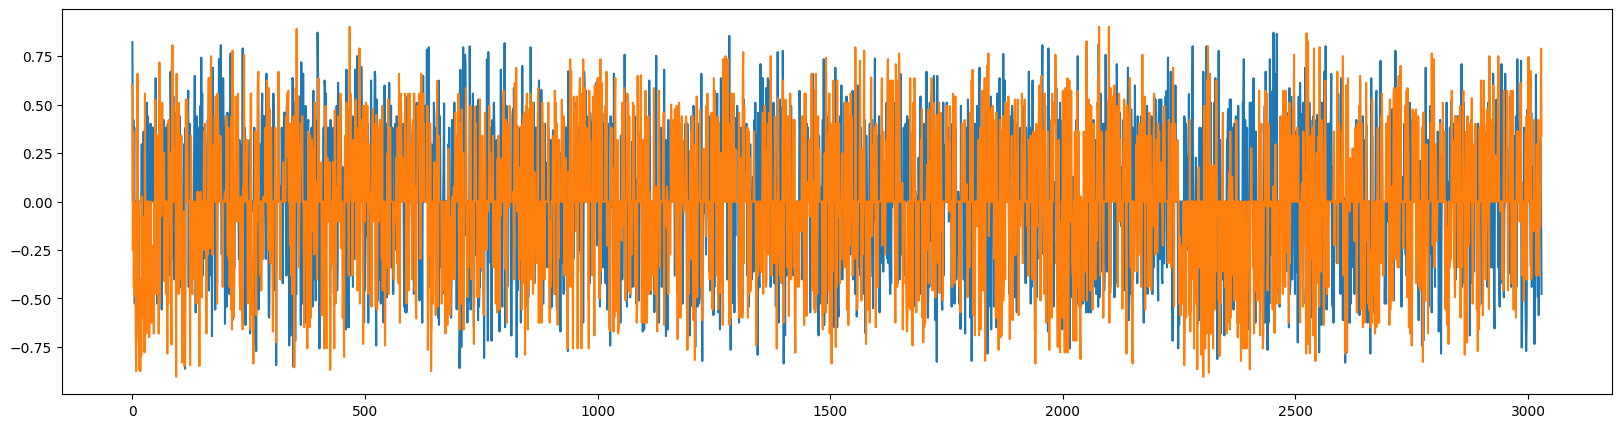

In [58]:
cmpd_economy[0].plot(kind='line', figsize=(20, 5))
cmpd_obama[0].plot(kind='line', figsize=(20, 5))

# Correlation Analysis

15) Find the correlation between the two topics' compound scores

In [59]:
cmpd_economy[0].corr(cmpd_obama[0])

-0.006852682774245876

16) Find the Pearson correlation coefficient between the two topics' compound scores

In [60]:
corr, _ = pearsonr(cmpd_obama[0], cmpd_economy[0])
print(corr)

-0.006852682774245891
